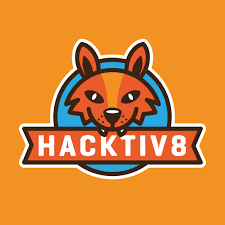

# Final Project 4 - Culstering

#### Kelompok 2 :
    1. LUKMAN PRASETYO NUGROHO - (PYTN-KS09-004)
    2. YONA ADE HERMAWAN - (PYTN-KS09-008)
    3. Ansharulhaq Aminsyah - (PYTN-KS09-012)

# Latar Belakang

Dataset ini digunakan untuk mengembangkan segmentasi customer untuk menentukan strategi pemasaran. Merangkum sekitar 9000 pemegang credit card aktif selama 6 bulan terakhir. Dataset ini terdiri dari 8950 bari dan 18 kolom.

# Objective

Project ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Clustering
* Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings   
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Loading

**Menampilkan 5 data teratas dan 5 data terbawah.**

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Menampilkan jumlah data non-null dan tipe data dari masing-masing kolomnya**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Dimension of dataframe**

In [4]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
8950 baris
18 kolom


**Index dataframe**

In [5]:
df.index

RangeIndex(start=0, stop=8950, step=1)

**View column names**

In [6]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**View number unique data**

In [7]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**Display unique value**

In [8]:
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
--------------------------------------------------------------------------------
Nilai Unique Kolom BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
--------------------------------------------------------------------------------
Nilai Unique Kolom BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
--------------------------------------------------------------------------------
Nilai Unique Kolom PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
-----------------------------------------------------------

**Check duplicate data**

In [9]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) 

Jumlah Duplicate Data  0


**View Basic statistic numerical column**

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Analisis :**
1. Dimensi data berjumlah 8950 baris dan 18 kolom dengan 14 kolom dengan tipe data float64, 3 kolom dengan tipe data numerik atau integer dan 1 kolom dengan tipe data categorical.
2. Kolom terdiri 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
3. Nilai unique tiap kolom sejumlah : CUST_ID = 8950, BALANCE = 8871, BALANCE_FREQUENCY = 43, PURCHASES = 6203, ONEOFF_PURCHASES = 4014, INSTALLMENTS_PURCHASES = 4452, CASH_ADVANCE = 4323, PURCHASES_FREQUENCY = 47, ONEOFF_PURCHASES_FREQUENCY = 47, PURCHASES_INSTALLMENTS_FREQUENCY = 47, CASH_ADVANCE_FREQUENCY = 54, CASH_ADVANCE_TRX = 65, PURCHASES_TRX = 173, CREDIT_LIMIT = 205, PAYMENTS = 8711, MINIMUM_PAYMENTS = 8636, PRC_FULL_PAYMENT = 47, TENURE = 7
4. Tidak terdapat duplicate data

# Data Cleaning

CUST_ID column dihapus karena dirasa tidak terlalu dibutuhkan.

In [11]:
df.drop("CUST_ID", axis = 1, inplace = True)

**View number of missing value**

In [12]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values() #Check if any column has null values

Jumlah Missing Value tiap column: 


BALANCE                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

**Find categorical variables**

In [13]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


**Find numerical variables**

In [14]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


**Filling the null values in numerical variable with mean**

In [15]:
df = df.fillna(df.mean())

**Check if any column has null value**

In [16]:
print('Jumlah Missing Value tiap column setelah dilakukan pengisian missing value: ')
df.isnull().sum() 

Jumlah Missing Value tiap column setelah dilakukan pengisian missing value: 


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Analisis :**
1. Mendeklarasikan categorical variable dan numerical variable.
2. Terdapat 2 kolom dengan missing value yaitu kolom MINIMUM_PAYMENTS = missing value 313 dan kolom CREDIT_LIMIT = missing value 1.
3. Mengisi missing value pada kolom MINIMUM_PAYMENTS dengan nilai meean.
Drop variable yang tidak dibutuhkan untuk modelling akan dilakukan pada data preprocessing.

# Exploratory Data Analysis

**Analisis TENURE**

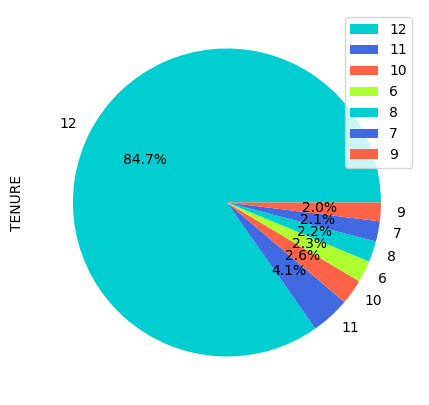

In [17]:
tenure = pd.DataFrame(df['TENURE'].value_counts())
plot = tenure.plot.pie(y='TENURE', figsize=(10, 5), autopct="%1.1f%%", colors=['darkturquoise','royalblue','tomato','greenyellow']);

**Analisis BALANCE**

In [18]:
# Balance MAX
balance_max = df["BALANCE"].max()
balance_max


19043.13856

In [19]:
# Balance MIN
balance_min = df["BALANCE"].min()
balance_min

0.0

In [20]:
# Balance Average
balance_max = df["BALANCE"].mean()
balance_max


1564.4748276781006

**Analisis Pembelian**

In [21]:
# Mengganti data dari numerik menjadi categorical agar lebih mudah
df_purchase = pd.DataFrame()
df_purchase["PURCHASES_FREQUENCY"] = np.where(df["PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased") 

In [22]:
purchase_freq = df_purchase["PURCHASES_FREQUENCY"].value_counts(normalize=True)*100
purchase_freq

not frequently purchased    75.664804
frequently purchased        24.335196
Name: PURCHASES_FREQUENCY, dtype: float64

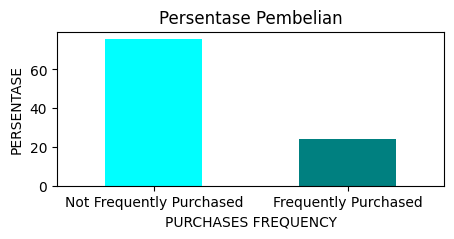

In [23]:
purchase_freq.plot(kind='bar', figsize=(5,2), color=['aqua','teal'])

plt.title('Persentase Pembelian')
plt.xlabel('PURCHASES FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()


**Analisis Pembayaran**

In [24]:
# Mengganti data dari numerik menjadi categorical agar lebih mudah
df_cashadv = pd.DataFrame()
df_cashadv["CASH_ADVANCE_FREQUENCY"] = np.where(df["CASH_ADVANCE_FREQUENCY"] < 1, "not often", "often")

In [25]:
cash_advance_freq = df_cashadv["CASH_ADVANCE_FREQUENCY"].value_counts(normalize=True)*100
cash_advance_freq

not often    99.631285
often         0.368715
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

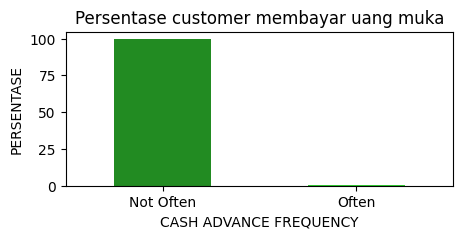

In [26]:
cash_advance_freq.plot(kind='bar', figsize=(5,2), color=['forestgreen','limegreen'])

plt.title('Persentase customer membayar uang muka')
plt.xlabel('CASH ADVANCE FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Often", "Often"], rotation="horizontal")

plt.show()

**Analisis :**
1. Masa berlaku kartu kredit (TENURE) yang dimiliki customer (TENURE) tertinggi yaitu 12 bulan, dengan persentase 84.7%.
2. Berdasarkan visualisasi data diatas, persentase customer yang sering melakukan pembelian (frequently purchased) ada 24.33% dan persentase customer yang tidak sering melakukan pembelian (not frequently purchased) ada 75.66%. Sehingga bisa disimpulkan sebagian besar customer tidak sering melakukan pembelian.
3. Berdasarkan visualisasi data diatas, persentase customer yang sering membayar uang muka (often) ada 0.3% dan persentase customer yang tidak sering membayar uang muka (not often) ada 99.63%. Sehingga bisa disimpulkan mayoritas customer tidak sering membayar uang muka.

# Data Preprocessing

**Outlier**

In [27]:
# Outlier Query
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


Terlihat bahwa sebagian besar variabel memiliki outlier.

<AxesSubplot:xlabel='BALANCE'>

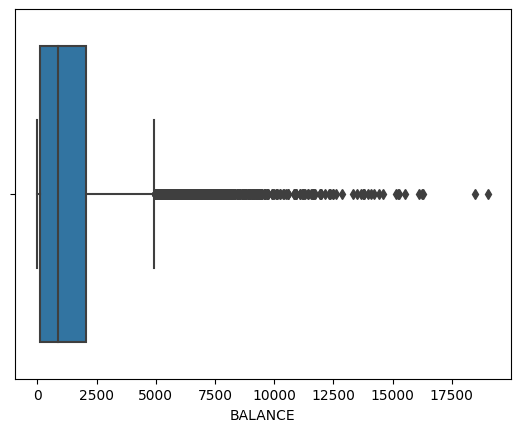

In [28]:
# Balane Outlier
sns.boxplot(x=df["BALANCE"])

<AxesSubplot:xlabel='PURCHASES'>

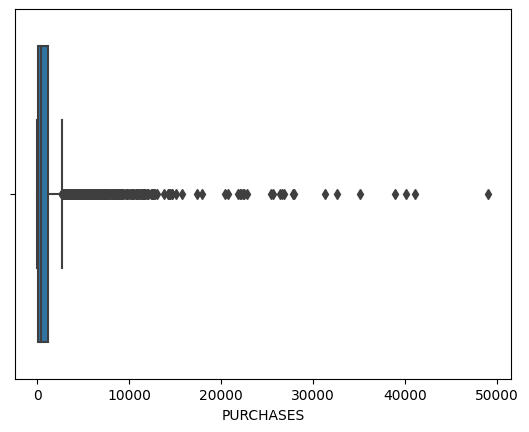

In [29]:
# for PURCHASES;
sns.boxplot(x=df["PURCHASES"])

**Penghapusan Outlier**

In [30]:
df.iloc[:,:-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [31]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [32]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


Outlier sudah dihapus, mari kita lihat visualisasinya

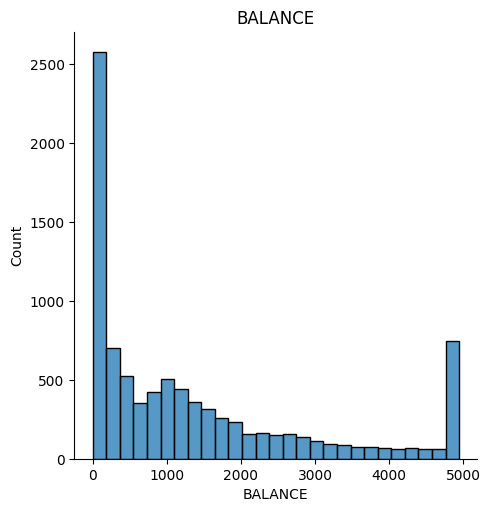

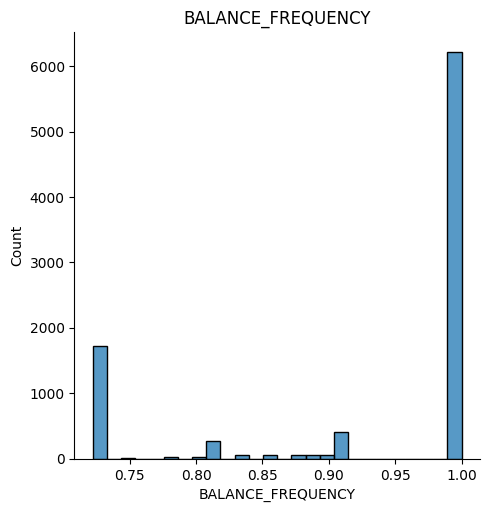

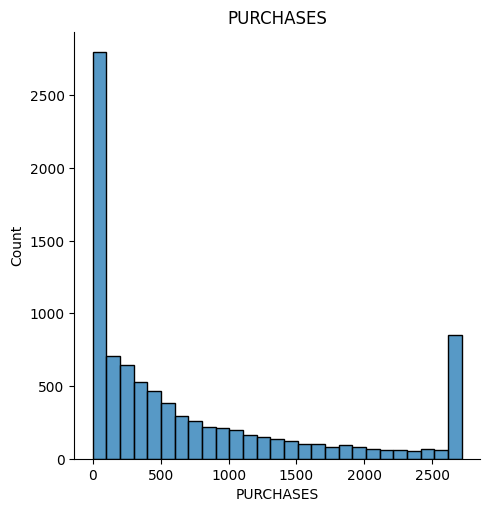

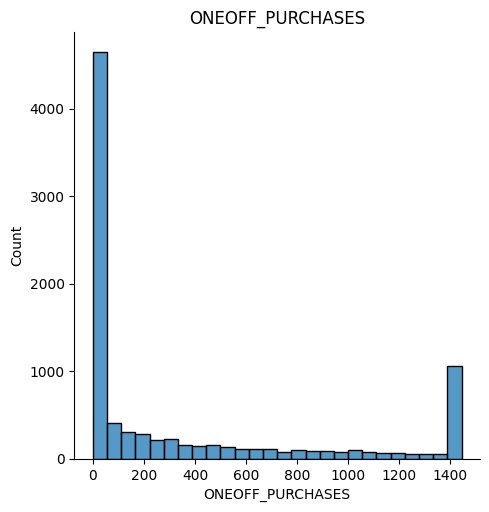

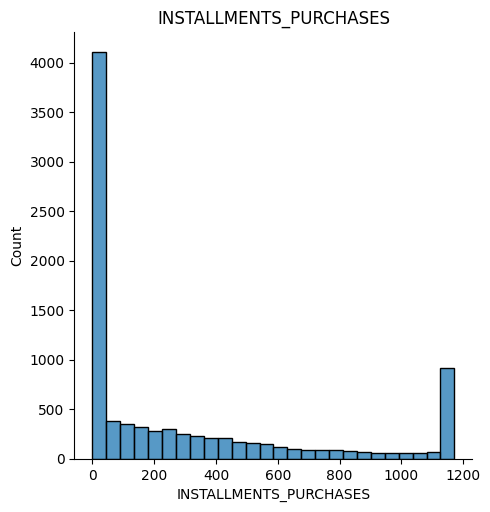

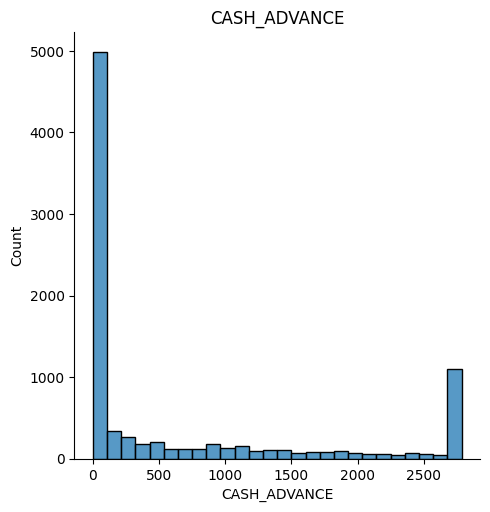

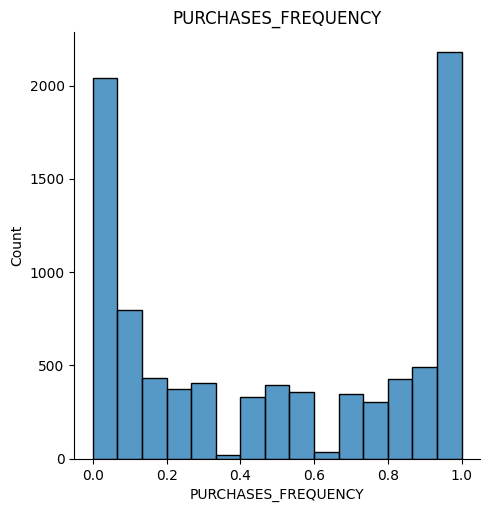

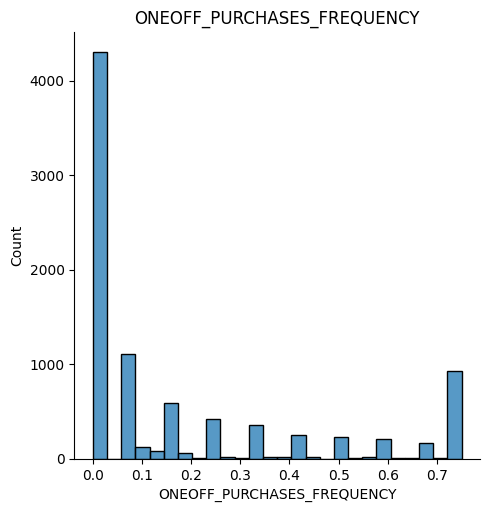

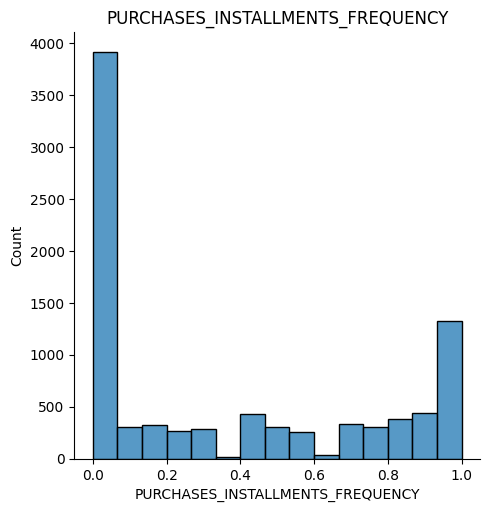

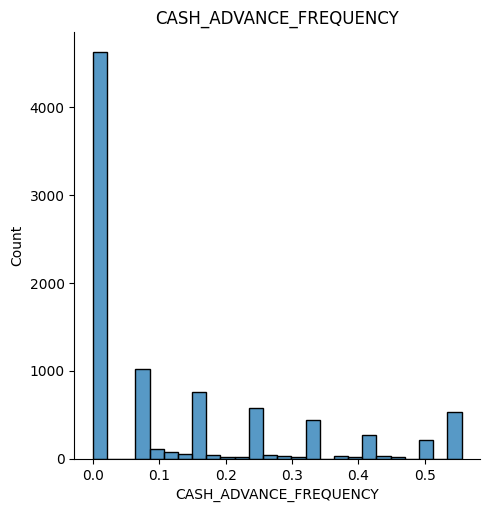

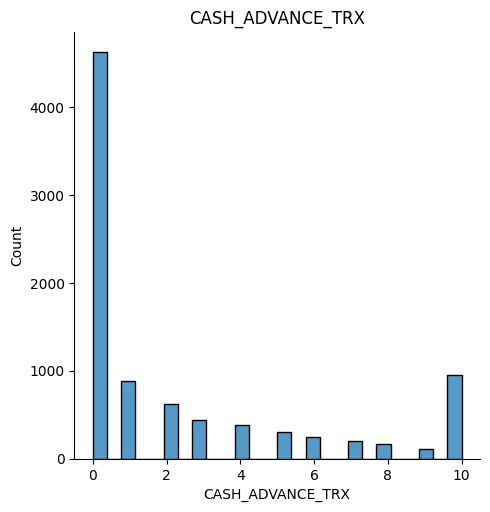

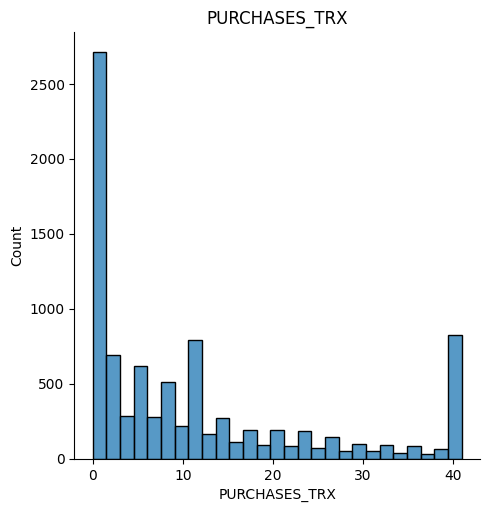

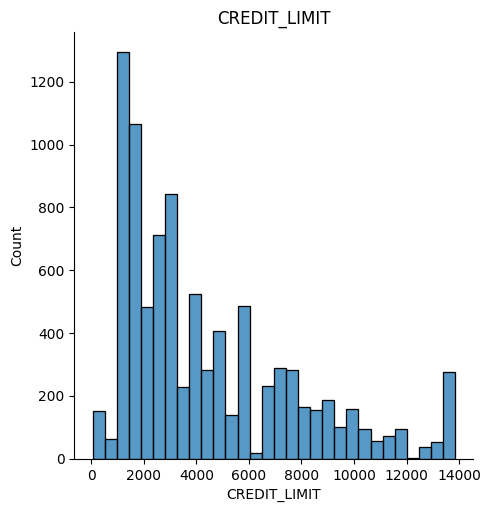

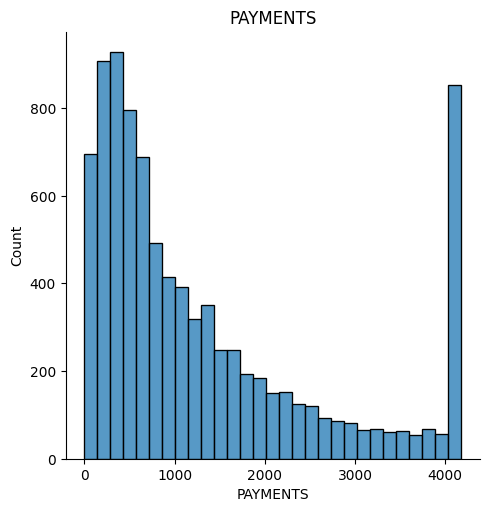

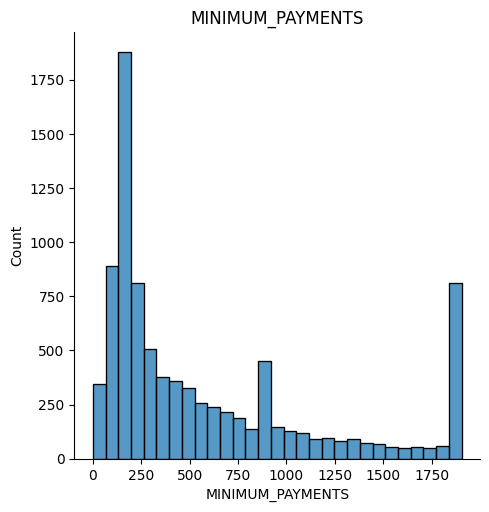

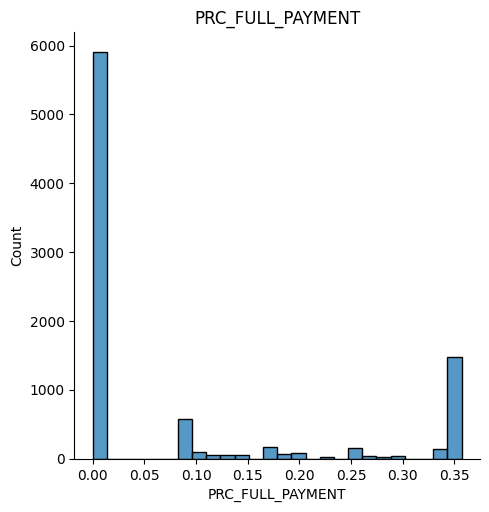

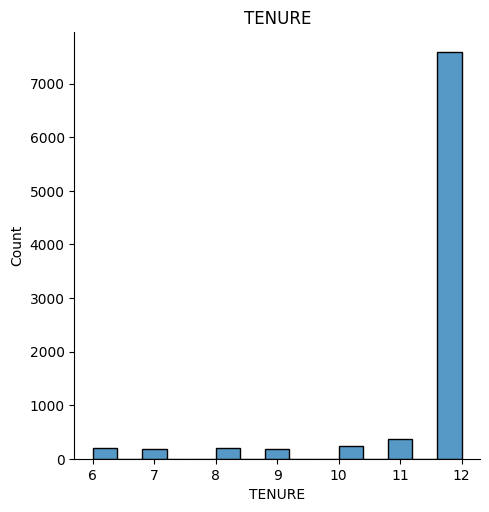

In [33]:
for i in df:
    sns.displot(x = i, data = df)
    plt.title(i)

**Correlation**

In [34]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.403457,0.095805,0.124043,0.009457,0.557393,-0.108922,0.081477,-0.096473,0.497089,0.500925,0.057123,0.488516,0.350558,0.802934,-0.419972,0.075417
BALANCE_FREQUENCY,0.403457,1.000000,0.184972,0.149539,0.161057,0.102849,0.222217,0.199187,0.180675,0.186646,0.175467,0.248062,0.107968,0.133318,0.306531,-0.183459,0.186697
PURCHASES,0.095805,0.184972,1.000000,0.830603,0.706135,-0.177093,0.631891,0.683525,0.488919,-0.207612,-0.190023,0.808546,0.330410,0.501153,0.071449,0.212936,0.120207
ONEOFF_PURCHASES,0.124043,0.149539,0.830603,1.000000,0.286764,-0.116870,0.408137,0.821933,0.152872,-0.127137,-0.117956,0.622341,0.321476,0.422124,0.045047,0.091038,0.087002
INSTALLMENTS_PURCHASES,0.009457,0.161057,0.706135,0.286764,1.000000,-0.185467,0.688315,0.249382,0.780193,-0.220042,-0.200208,0.725475,0.191926,0.324137,0.052574,0.254259,0.111298
CASH_ADVANCE,0.557393,0.102849,-0.177093,-0.116870,-0.185467,1.000000,-0.319499,-0.134830,-0.264589,0.769767,0.801425,-0.203801,0.258418,0.331303,0.420883,-0.227197,-0.099027
PURCHASES_FREQUENCY,-0.108922,0.222217,0.631891,0.408137,0.688315,-0.319499,1.000000,0.499498,0.862934,-0.336823,-0.315382,0.795194,0.118192,0.163930,-0.052645,0.316356,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.081477,0.199187,0.683525,0.821933,0.249382,-0.134830,0.499498,1.000000,0.143475,-0.121845,-0.118664,0.650300,0.293008,0.336919,0.007255,0.123273,0.077257
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096473,0.180675,0.488919,0.152872,0.780193,-0.264589,0.862934,0.143475,1.000000,-0.285161,-0.264110,0.700146,0.057750,0.120975,-0.023301,0.266671,0.073275
CASH_ADVANCE_FREQUENCY,0.497089,0.186646,-0.207612,-0.127137,-0.220042,0.769767,-0.336823,-0.121845,-0.285161,1.000000,0.930204,-0.217631,0.128309,0.213939,0.360433,-0.268737,-0.127145


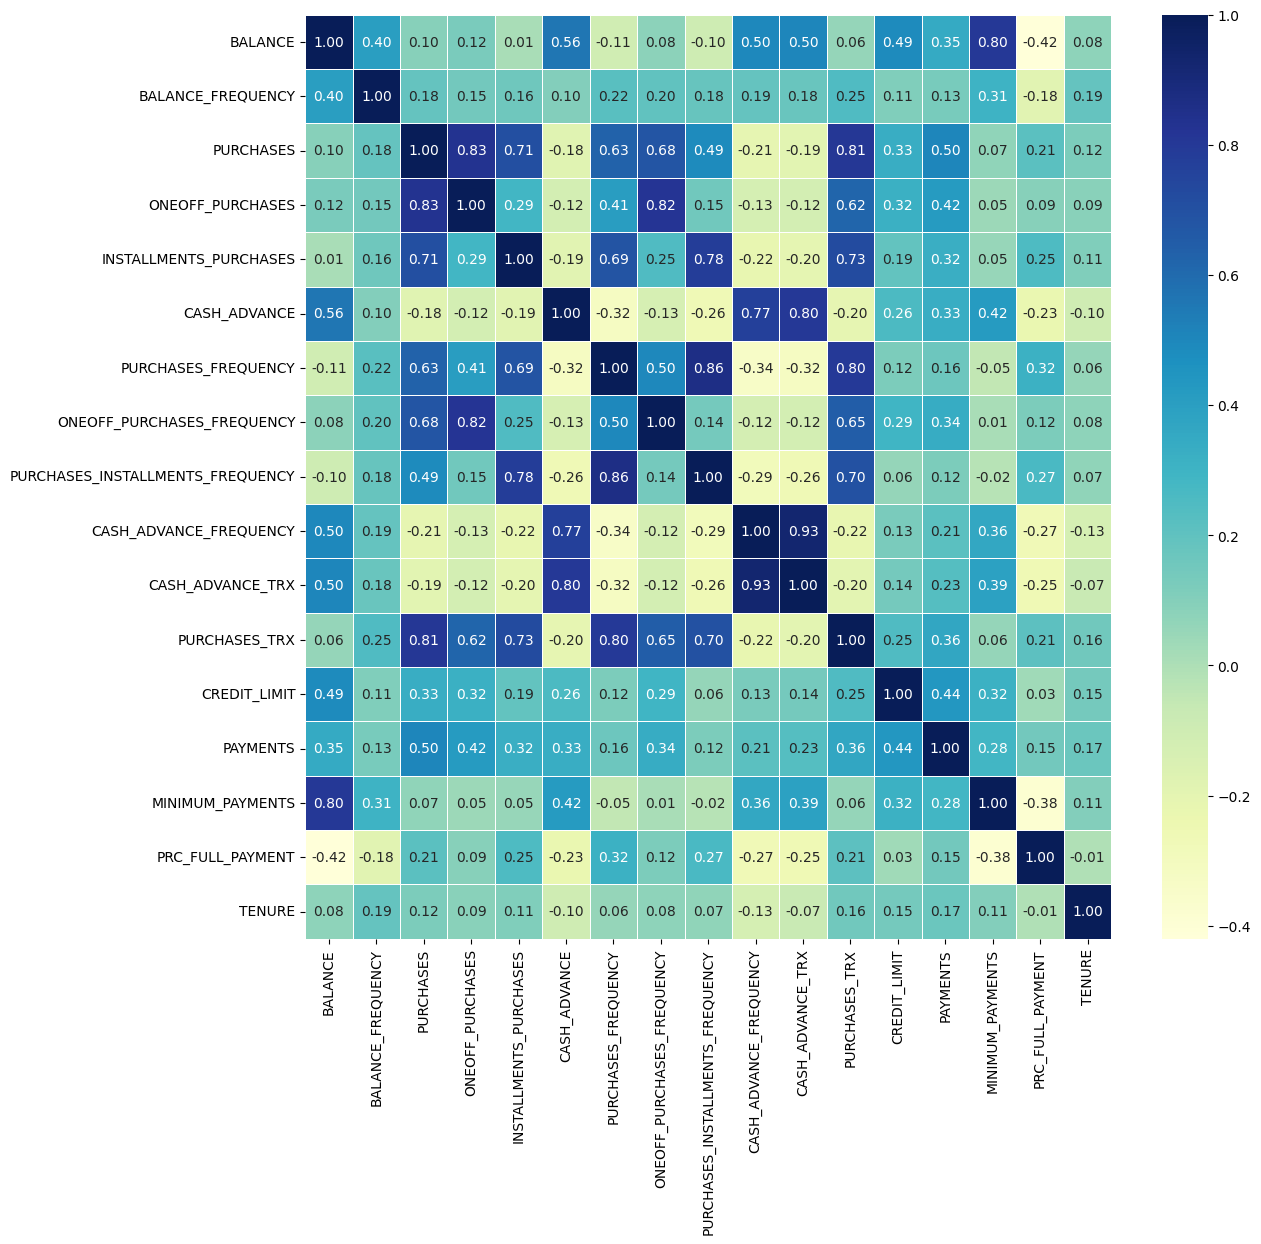

In [35]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.6, fmt=".2f", cmap='YlGnBu')
plt.show()

Nilai korelasi tertinggi adalah 0,93 sedangkan nilai korelasi terendah adalah -0,42

# Modelling

**Standard Scaler**

In [36]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-8.891708e-17,-1.244839e-15,1.460781e-16,1.333756e-16,1.238488e-16,5.874878e-17,9.328354e-17,-6.351220e-18,5.716098e-17,-1.841854e-16,-1.984756e-17,5.716098e-17,1.397268e-16,8.256586e-17,-1.333756e-16,-6.351220e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-9.044240e-01,-1.886552e+00,-8.381596e-01,-6.923834e-01,-7.460285e-01,-6.735067e-01,-1.221758e+00,-7.227488e-01,-9.169952e-01,-7.300836e-01,-6.972927e-01,-8.913330e-01,-1.291331e+00,-1.058417e+00,-1.037909e+00,-6.292774e-01,-4.122768e+00
25%,-8.209860e-01,-3.847451e-01,-7.930935e-01,-6.923834e-01,-7.460285e-01,-6.735067e-01,-1.014125e+00,-7.227488e-01,-9.169952e-01,-7.300836e-01,-6.972927e-01,-8.146512e-01,-8.332345e-01,-7.572730e-01,-7.392443e-01,-6.292774e-01,3.606795e-01
50%,-3.363510e-01,6.164594e-01,-4.273740e-01,-6.181349e-01,-5.213715e-01,-6.735067e-01,2.404259e-02,-3.967881e-01,-4.976286e-01,-7.300836e-01,-6.972927e-01,-3.545609e-01,-4.194699e-01,-3.851411e-01,-4.511879e-01,-6.292774e-01,3.606795e-01
75%,4.316433e-01,6.164594e-01,4.240895e-01,4.358132e-01,4.369233e-01,4.420333e-01,1.062211e+00,4.507143e-01,9.701506e-01,5.569155e-01,4.730894e-01,4.122564e-01,6.149416e-01,4.353224e-01,4.728864e-01,4.013761e-01,3.606795e-01
max,2.310587e+00,6.164594e-01,2.249864e+00,2.128108e+00,2.211351e+00,2.115343e+00,1.269843e+00,2.210909e+00,1.599199e+00,2.487414e+00,2.228662e+00,2.252618e+00,2.787206e+00,2.224216e+00,2.291082e+00,1.947356e+00,3.606795e-01


In [37]:
X = np.asarray(df)
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

**Defining & Fitting**

In [38]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

**Intertia**

In [39]:
kmeans.inertia_

118306.51094526614

**Elbow Curve**

Text(0, 0.5, 'Inertia')

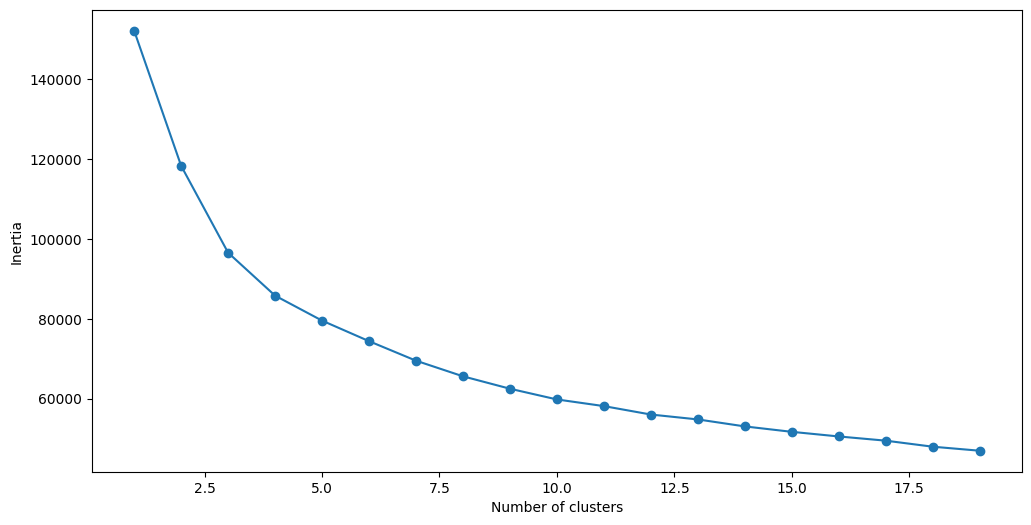

In [40]:
SSE = []
for cluster in range(1, 20):
    kmeans=KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [42]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    4589
1    2304
2    2057
Name: cluster, dtype: int64

**Menggunakan PCA untuk mengubah data menjadi 2D untuk visualisasi**

In [43]:
dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

In [44]:
dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

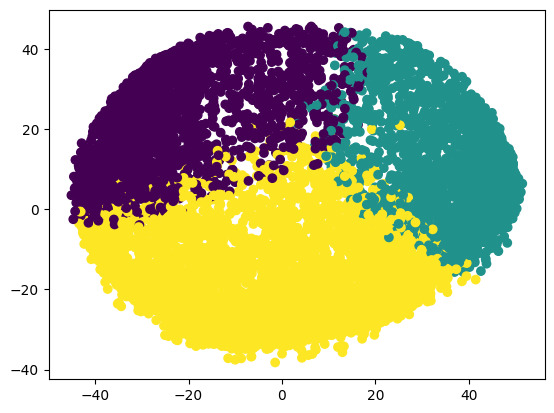

In [45]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
plt.scatter(x, y, c = kmeans.fit_predict(X))
plt.show()

**Conclusion**
1. Terdapat missing value di variabel CREDIT_LIMIT (1 missing value) dan MINIMUM_PAYMENTS (313 missing value).
2. Saat menggunakan kartu kredit, sebagian besar customer kartu kredit lebih memilih masa berlaku (Tenure) 12 bulan dibandingkan opsi masa berlaku (Tenure) lainnya.
3. Beberapa variabel memiliki nilai korelasi sedang hingga tinggi terhadap variabel lain (>0,5 hingga 1). Contoh variabel korelasi tinggi adalah PURCHASES dengan ONE_OFF_PURCHASES, dengan nilai korelasi 0,92. Contoh lain adalah CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY dengan nilai korelasi 0,8.
4. Persentase saldo customer yang sering diperbarui (frequently updated) ada 69.39% dan persentase saldo customer yang tidak sering diperbarui (not frequently updated) ada 30.60%. Sehingga bisa disimpulkan sebagian besar customer sering memperbarui saldo kartu kreditnya.